In [5]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

1. Загрузить файл auto.csv

In [46]:
pd.read_csv('auto.csv', delimiter = ',').head(25)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,158,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,158,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,192,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,23875


2. Рассчитать основные статистики для переменных(среднее, медиана, мода, мин/макс, сред. отклонение)

In [14]:
data = pd.read_csv('auto.csv', delimiter = ',')
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


3. Рассчитать и визуализировать корреляционную матрицу для переменных

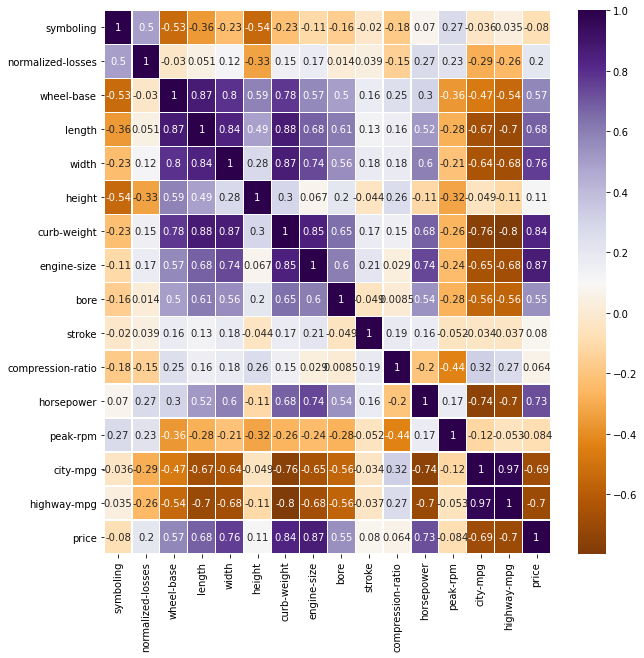

In [25]:
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.PuOr,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis




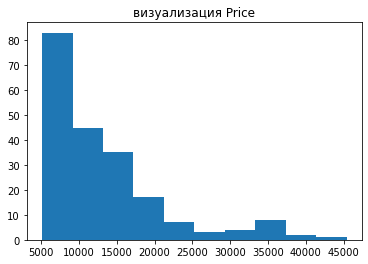

Kurtosis = 2.948637293212561
Skewness = 1.7663998888191028


In [34]:
plt.hist(data['price'])
plt.title('визуализация Price')
plt.show()
print('Kurtosis =', data['price'].kurtosis())
print('Skewness =', data['price'].skew())

5. Визуализировать несколько взаимосвязей между переменными

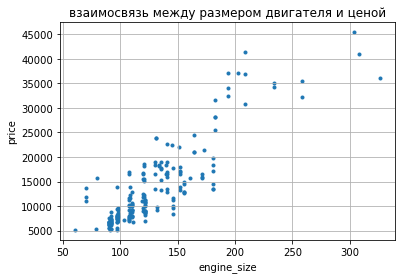

In [40]:
engine_size = data['engine-size']
price = data['price']
plt.xlabel('engine_size')
plt.ylabel('price')
plt.title('взаимосвязь между размером двигателя и ценой')
plt.grid(True)
plt.scatter(engine_size, price, marker='.')

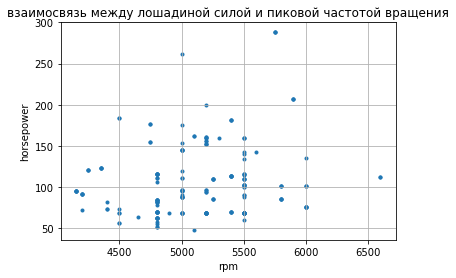

In [43]:
horsepower = data['horsepower']
rpm = data['peak-rpm']
plt.xlabel('rpm')
plt.ylabel('horsepower')
plt.title('взаимосвязь между лошадиной силой и пиковой частотой вращения')
plt.grid(True)
plt.scatter(rpm, horsepower, marker='.')

6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test

In [ ]:
Гипотеза 1: длина машины не зависит от количества дверей

In [49]:
numdor2=data[data['num-of-doors']=='two']['length']
numdor4=data[data['num-of-doors']=='four']['length']
print(stats.ttest_ind(numdor2, numdor4))

Ttest_indResult(statistic=-5.955799314578493, pvalue=1.1248355074784215e-08)


pvalue=1.12e-08 < 0.05 => гипотеза неверна

Гипотеза 1: размер двигателя зависит от количества ведущих колес

In [53]:
wheelsf=data[data['drive-wheels']=='fwd']['engine-size']
wheels4=data[data['drive-wheels']=='4wd']['engine-size']
wheelsr=data[data['drive-wheels']=='rwd']['engine-size']

stats.f_oneway(wheelsf, wheels4, wheelsr)

F_onewayResult(statistic=47.49486786467341, pvalue=1.2405174647931165e-17)

pvalue=1.24e-17 < 0.05 => гипотеза неверна